In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [37]:
df = pd.read_csv('/Users/Marcy_Student/Desktop/Mod 6 Project/Motor_Vehicle_Collisions_-_Crashes_20251208.csv', low_memory=False,)

In [38]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [39]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [40]:
#filter the dataframe to only include rows from the year 2022 to present
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df = df[df['crash_date'].dt.year >= 2022]

In [41]:
df.shape

(370001, 29)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370001 entries, 1 to 2225403
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     370001 non-null  datetime64[ns]
 1   crash_time                     370001 non-null  object        
 2   borough                        262335 non-null  object        
 3   zip_code                       262283 non-null  object        
 4   latitude                       345831 non-null  float64       
 5   longitude                      345831 non-null  float64       
 6   location                       345831 non-null  object        
 7   on_street_name                 264953 non-null  object        
 8   cross_street_name              189152 non-null  object        
 9   off_street_name                105044 non-null  object        
 10  number_of_persons_injured      370001 non-null  float64       
 11  numb

In [43]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [44]:
df.describe()

,crash_date,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,370001,345831.000000,345831.000000,370001.000000,370001.000000,370001.000000,370001.000000,370001.000000,370001.000000,370001.000000,370001.000000,3.700010e+05
mean,2023-11-19 17:24:52.371101696,40.195899,-72.963433,0.556401,0.002827,0.096911,0.001276,0.055213,0.000257,0.382740,0.001154,4.676924e+06
min,2022-01-01 00:00:00,0.000000,-74.254960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.491064e+06
25%,2022-11-19 00:00:00,40.663660,-73.967572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.584411e+06
50%,2023-11-02 00:00:00,40.713270,-73.921680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.676931e+06
75%,2024-11-03 00:00:00,40.771782,-73.865650,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.769456e+06
max,2025-12-02 00:00:00,40.912827,0.000000,40.000000,5.000000,19.000000,4.000000,3.000000,1.000000,40.000000,5.000000,4.862227e+06
std,NaN,4.600403,8.349791,0.847067,0.056306,0.312998,0.036739,0.232676,0.016022,0.825209,0.037507,1.068545e+05


In [45]:
df.groupby('borough')['number_of_persons_injured'].sum().sort_values(ascending=False)

borough
BROOKLYN         49894.0
QUEENS           36671.0
BRONX            23238.0
MANHATTAN        22483.0
STATEN ISLAND     5193.0
Name: number_of_persons_injured, dtype: float64

In [46]:
# convert longitude and lalitude columns to numeric and round them
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce').round(2)
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce').round(2)

In [47]:
# Let's map all the missing borough using longitude and latitude

def borough_from_latlong(lat, lon):
    if lon > -74.05 and lon < -73.90 and lat > 40.70 and lat < 40.88:
        return "Manhattan"
    if lon > -74.20 and lon < -73.70 and lat > 40.55 and lat < 40.70:
        return "Brooklyn"
    if lon > -74.25 and lon < -73.70 and lat > 40.50 and lat < 40.75:
        return "Queens"
    if lon > -74.25 and lon < -74.10 and lat > 40.45 and lat < 40.65:
        return "Staten Island"
    if lon > -73.93 and lon < -73.75 and lat > 40.80 and lat < 40.93:
        return "Bronx"
    return np.nan

df["borough"] = df.apply(lambda row: borough_from_latlong(row.latitude, row.longitude), axis=1)
df["borough"].value_counts()

borough
Brooklyn         135543
Manhattan         95106
Queens            46907
Bronx             40147
Staten Island        28
Name: count, dtype: int64

In [48]:
df.isna().sum()

crash_date                            0
crash_time                            0
borough                           52270
zip_code                         107718
latitude                          24170
longitude                         24170
location                          24170
on_street_name                   105048
cross_street_name                180849
off_street_name                  264957
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
contributing_factor_vehicle_3    336544
contributing_factor_vehicle_4    361202
contributing_factor_vehicle_5    367372
collision_id                          0
vehicle_type_code_1                5943


In [49]:
zip_codes = [
10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011,
10012, 10013, 10014, 10016, 10017, 10018, 10019, 10020, 10021, 10022,
10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032,
10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10044,
10048, 10069, 10103, 10111, 10112, 10115, 10119, 10128, 10152, 10153,
10154, 10162, 10165, 10167, 10169, 10170, 10171, 10172, 10173, 10177,
10271, 10278, 10279, 10280, 10282, 10301, 10302, 10303, 10304, 10305,
10306, 10307, 10308, 10309, 10310, 10312, 10314, 10451, 10452, 10453,
10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463,
10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473,
10474, 10475, 11001, 11004, 11005, 11040, 11101, 11102, 11103, 11104,
11105, 11106, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209,
11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230,
11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11354,
11355, 11356, 11357, 11358, 11360, 11361, 11362, 11363, 11364, 11365,
11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375,
11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416,
11417, 11418, 11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428,
11429, 11430, 11432, 11433, 11434, 11435, 11436, 11691, 11692, 11693,
11694, 11697
]


In [50]:
zipcode_mapping = {zip_codes[i]: 'Manhattan' for i in range(0, 66)}
zipcode_mapping.update({zip_codes[i]: 'Brooklyn' for i in range(66, 102)})
zipcode_mapping.update({zip_codes[i]: 'Queens' for i in range(102, 142)})
zipcode_mapping.update({zip_codes[i]: 'Staten Island' for i in range(142, 157)})
zipcode_mapping.update({zip_codes[i]: 'Bronx' for i in range(157, len(zip_codes))})

In [51]:
def _zip_to_borough(zip_val, current_borough):
    try:
        if pd.isna(current_borough):
            if zip_val is None or (isinstance(zip_val, float) and np.isnan(zip_val)):
                return current_borough
            z = int(float(zip_val))
            return zipcode_mapping.get(z, current_borough)
        return current_borough
    except Exception:
        return current_borough

df["borough"] = df.apply(lambda row: _zip_to_borough(row.zip_code, row.borough), axis=1)

In [52]:
df.isna().sum()

crash_date                            0
crash_time                            0
borough                           27583
zip_code                         107718
latitude                          24170
longitude                         24170
location                          24170
on_street_name                   105048
cross_street_name                180849
off_street_name                  264957
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
contributing_factor_vehicle_3    336544
contributing_factor_vehicle_4    361202
contributing_factor_vehicle_5    367372
collision_id                          0
vehicle_type_code_1                5943


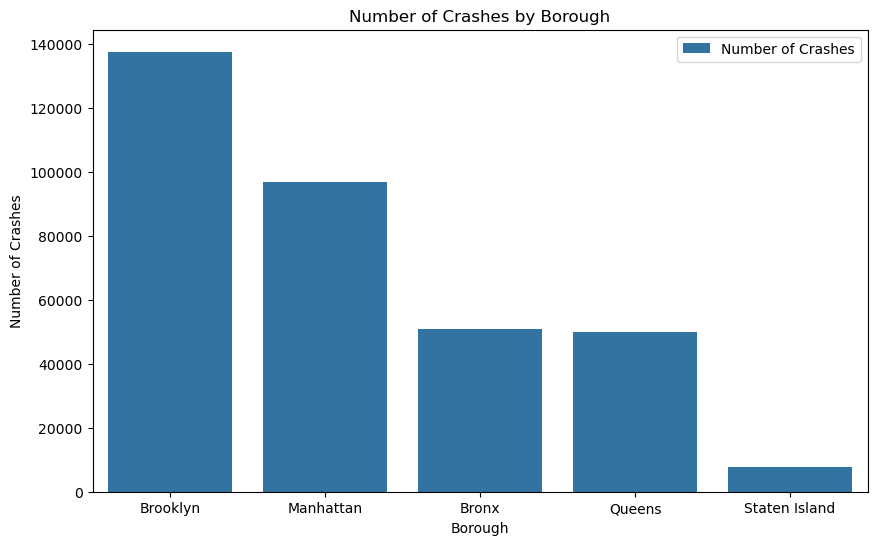

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='borough', order=df['borough'].value_counts().index, label='Number of Crashes')
plt.title('Number of Crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.show()

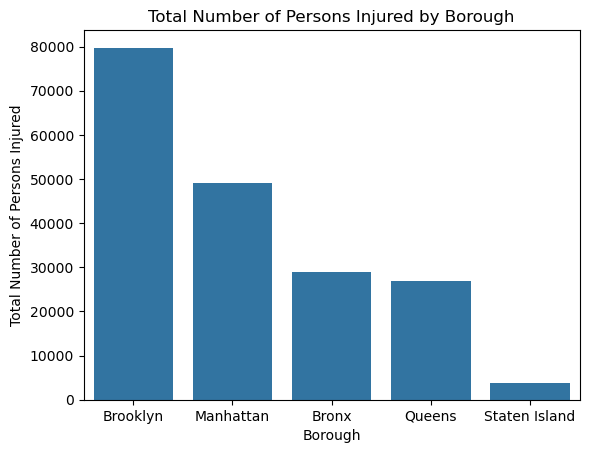

In [54]:
# Number of person injured by borough
sns.barplot(x=df.groupby('borough')['number_of_persons_injured'].sum().sort_values(ascending=False).index,
            y=df.groupby('borough')['number_of_persons_injured'].sum().sort_values(ascending=False).values)
plt.title('Total Number of Persons Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Injured')
plt.show()

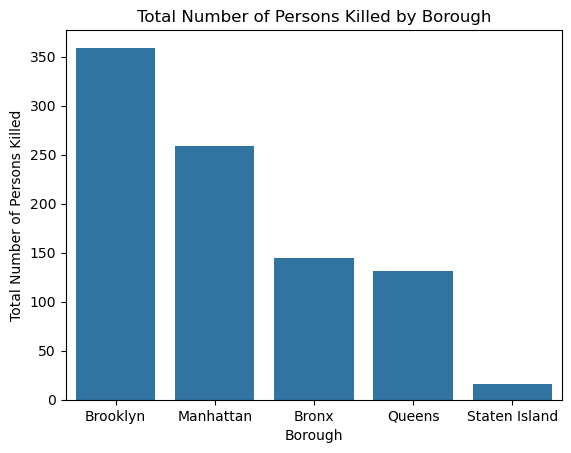

In [55]:
sns.barplot(x=df.groupby('borough')['number_of_persons_killed'].sum().sort_values(ascending=False).index,
            y=df.groupby('borough')['number_of_persons_killed'].sum().sort_values(ascending=False).values)
plt.title('Total Number of Persons Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed')
plt.show()

In [56]:
# Checking other critical missing values
missing_pct = (df.isnull().sum() / len(df)) * 100


In [57]:
missing_pct

crash_date                        0.000000
crash_time                        0.000000
borough                           7.454845
zip_code                         29.112894
latitude                          6.532415
longitude                         6.532415
location                          6.532415
on_street_name                   28.391275
cross_street_name                48.877976
off_street_name                  71.609806
number_of_persons_injured         0.000000
number_of_persons_killed          0.000000
number_of_pedestrians_injured     0.000000
number_of_pedestrians_killed      0.000000
number_of_cyclist_injured         0.000000
number_of_cyclist_killed          0.000000
number_of_motorist_injured        0.000000
number_of_motorist_killed         0.000000
contributing_factor_vehicle_1     0.673512
contributing_factor_vehicle_2    23.682909
contributing_factor_vehicle_3    90.957592
contributing_factor_vehicle_4    97.621898
contributing_factor_vehicle_5    99.289461
collision_i

In [58]:
high_missing = missing_pct[missing_pct > 50].sort_values(ascending=False)
high_missing

vehicle_type_code_5              99.319461
contributing_factor_vehicle_5    99.289461
vehicle_type_code_4              97.753249
contributing_factor_vehicle_4    97.621898
vehicle_type_code_3              91.607861
contributing_factor_vehicle_3    90.957592
off_street_name                  71.609806
dtype: float64

In [59]:
# Lets drop all unnecessary columns for our analysis having high missing values
columns_to_drop = ['vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
                   'contributing_factor_vehicle_3','contributing_factor_vehicle_4',
                   'contributing_factor_vehicle_5','location',
                   'off_street_name']


# OFF_STREET_NAME is not needed for our analysis, we can drop it


- Location column is a combination of latitude and longitude which we already have as separate columns.
- off street names is not relevant for our analysis.
- Vehicles 3,4,5 are less common and will be dropped for simplicity.
- contributing factors for vehicles 3,4,5 will also be dropped accordingly.

In [60]:
print(f"Shape before dropping: {df.shape}\n")


Shape before dropping: (370001, 29)



In [61]:
# Lets drop all unnecessary columns for our analysis
df = df.drop(columns=columns_to_drop)

In [62]:
print(f"Shape after dropping: {df.shape}\n")


Shape after dropping: (370001, 21)



In [63]:
df.isna().sum()

crash_date                            0
crash_time                            0
borough                           27583
zip_code                         107718
latitude                          24170
longitude                         24170
on_street_name                   105048
cross_street_name                180849
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      2492
contributing_factor_vehicle_2     87627
collision_id                          0
vehicle_type_code_1                5943
vehicle_type_code_2              125095
dtype: int64

In [64]:
# Let's convert date and time columns to datetime necessary for our analysis
# Convert dates and times
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M', errors='coerce').dt.time

# Clean contributing factors - replace Unspecified with Unknown
factor_cols = [col for col in df.columns if 'contributing_factor' in col]
for col in factor_cols:
    df[col] = df[col].fillna('Unknown')

# Clean vehicle types
vehicle_cols = [col for col in df.columns if 'vehicle_type_code' in col]
for col in vehicle_cols:
    df[col] = df[col].fillna('Unknown')


#### FEATURE ENGINEERING


In [65]:
import datetime as dt

df['day_of_week'] = df['crash_date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['crash_date'].dt.month
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df['hour'] = df['crash_time'].apply(lambda x: x.hour if pd.notna(x) else np.nan)


In [66]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,...,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2,day_of_week,month,is_weekend,hour
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,0,Pavement Slippery,Unknown,4513547,Sedan,Unknown,5,3,1,11
2,2023-11-01,01:29:00,Brooklyn,11230,40.62,-73.97,OCEAN PARKWAY,AVENUE K,1.0,0.0,...,0,Unspecified,Unspecified,4675373,Moped,Sedan,2,11,0,1
3,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck,2,6,0,6
4,2022-09-21,13:21:00,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,0.0,0.0,...,0,Passing Too Closely,Unspecified,4566131,Station Wagon/Sport Utility Vehicle,Unknown,2,9,0,13
5,2023-04-26,13:30:00,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,0.0,0.0,...,0,Unspecified,Unspecified,4623759,Sedan,Box Truck,2,4,0,13


In [67]:
# let's create a little function to categorize time of day
def categorize_hour(hour):
    if pd.isna(hour):
        return 'Unknown'
    elif 6 <= hour < 10:
        return 'Morning_Rush'
    elif 10 <= hour < 16:
        return 'Midday'
    elif 16 <= hour < 20:
        return 'Evening_Rush'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Late_Night'   
    
df['hour_category'] = df['hour'].apply(categorize_hour)


In [68]:
# Season
def get_season(month):
    if pd.isna(month):
        return 'Unknown'
    elif month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

In [69]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,...,contributing_factor_vehicle_2,collision_id,vehicle_type_code_1,vehicle_type_code_2,day_of_week,month,is_weekend,hour,hour_category,season
1,2022-03-26,11:45:00,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,1.0,0.0,...,Unknown,4513547,Sedan,Unknown,5,3,1,11,Midday,Spring
2,2023-11-01,01:29:00,Brooklyn,11230,40.62,-73.97,OCEAN PARKWAY,AVENUE K,1.0,0.0,...,Unspecified,4675373,Moped,Sedan,2,11,0,1,Late_Night,Fall
3,2022-06-29,06:55:00,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,0.0,0.0,...,Unspecified,4541903,Sedan,Pick-up Truck,2,6,0,6,Morning_Rush,Summer
4,2022-09-21,13:21:00,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,0.0,0.0,...,Unspecified,4566131,Station Wagon/Sport Utility Vehicle,Unknown,2,9,0,13,Midday,Fall
5,2023-04-26,13:30:00,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,0.0,0.0,...,Unspecified,4623759,Sedan,Box Truck,2,4,0,13,Midday,Spring


In [70]:
# Pedestrian/Cyclist involvement flags
df['pedestrian_involved'] = ((df['number_of_pedestrians_injured'] > 0) | (df['number_of_pedestrians_killed'] > 0)).astype(int)
df['cyclist_involved'] = ((df['number_of_cyclist_injured'] > 0) | (df['number_of_cyclist_killed'] > 0)).astype(int)

In [71]:
df['vehicle_type_code_1'] = df['vehicle_type_code_1'].str.strip().str.upper()
df['vehicle_type_code_2'] = df['vehicle_type_code_2'].str.strip().str.upper()
df['contributing_factor_vehicle_1'] = df['contributing_factor_vehicle_1'].str.strip().str.upper()
df['contributing_factor_vehicle_2'] = df['contributing_factor_vehicle_2'].str.strip().str.upper()

In [72]:
# Risk factor indicators (from contributing factors)
risk_keywords = ['UNSAFE LANE CHANGING','DRUGS (ILLEGAL)',
                'PASSENGER DISTRACTION', 'AGGRESSIVE DRIVING/ROAD RAGE',
                'TEXTING', 'ALCOHOL INVOLVEMENT', 'UNSAFE SPEED']

In [73]:

def has_risk_factor(row):
    for col in factor_cols:     
        factor = str(row[col]).upper()
        if any(keyword in factor for keyword in risk_keywords):
            return 1
    return 0

df['high_risk'] = df.apply(has_risk_factor, axis=1)

In [74]:
top_contributing_factor_vehicule2 = df['contributing_factor_vehicle_2'].value_counts().nlargest(5)
top_contributing_factor_vehicule1 = df['contributing_factor_vehicle_1'].value_counts().nlargest(5)

In [75]:
top5_vehicle_type1 = df['vehicle_type_code_1'].value_counts().nlargest(5)
top5_vehicle_type2 = df['vehicle_type_code_2'].value_counts().nlargest(5)

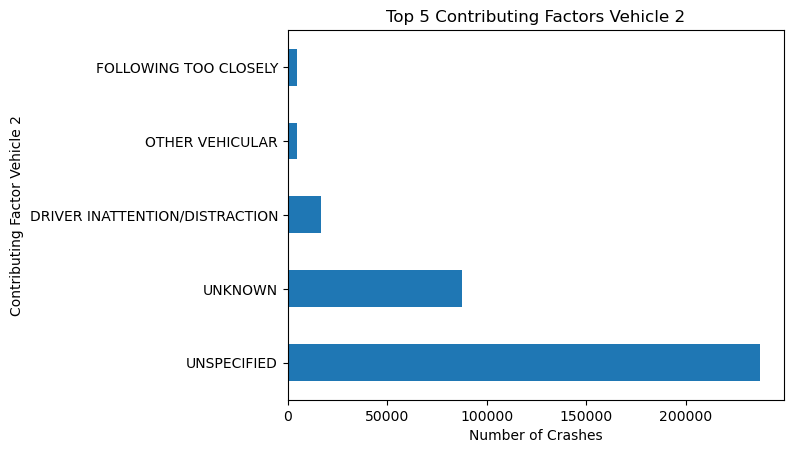

In [76]:
top_contributing_factor_vehicule2.plot(kind='barh', title='Top 5 Contributing Factors Vehicle 2')
plt.xlabel('Number of Crashes')
plt.ylabel('Contributing Factor Vehicle 2')
plt.show()

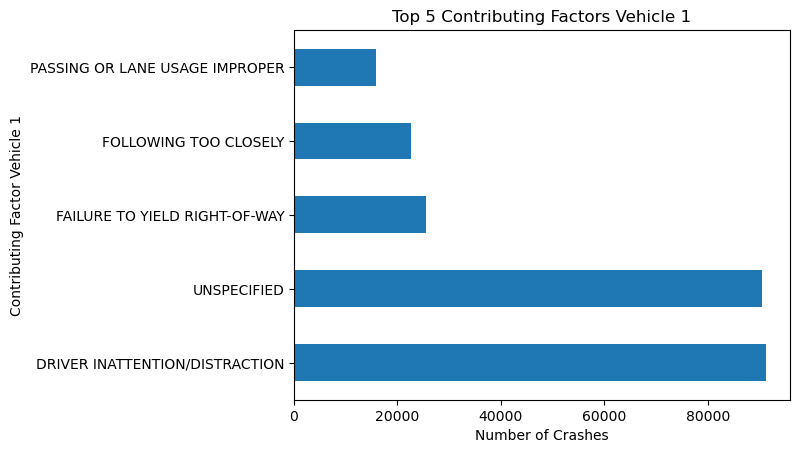

In [77]:
top_contributing_factor_vehicule1.plot(kind='barh', title='Top 5 Contributing Factors Vehicle 1')
plt.xlabel('Number of Crashes')
plt.ylabel('Contributing Factor Vehicle 1')
plt.show()

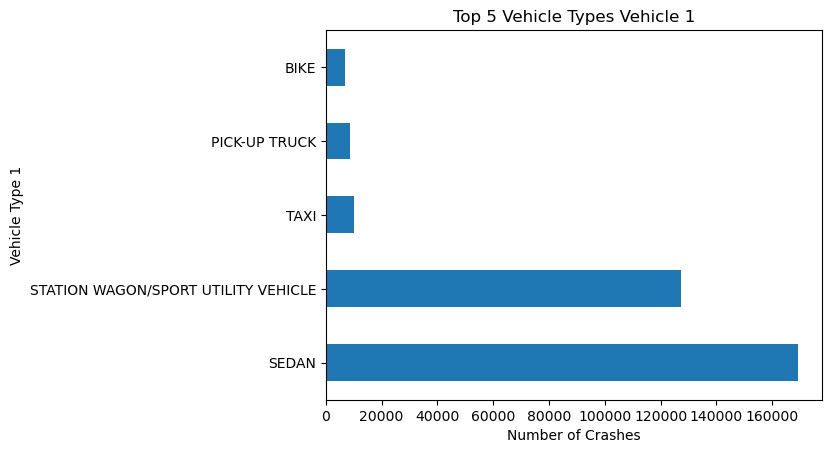

In [78]:
top5_vehicle_type1.plot(kind='barh', title='Top 5 Vehicle Types Vehicle 1')
plt.xlabel('Number of Crashes')
plt.ylabel('Vehicle Type 1')
plt.show()

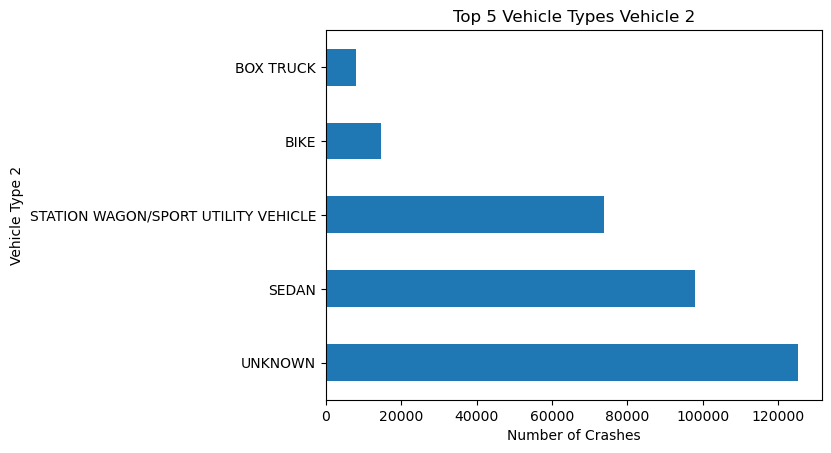

In [79]:
top5_vehicle_type2.plot(kind='barh', title='Top 5 Vehicle Types Vehicle 2')
plt.xlabel('Number of Crashes')
plt.ylabel('Vehicle Type 2')
plt.show()

In [80]:
df['pedestrian_involved'].value_counts()

pedestrian_involved
0    335206
1     34795
Name: count, dtype: int64

In [81]:
df['cyclist_involved'].value_counts()

cyclist_involved
0    349836
1     20165
Name: count, dtype: int64

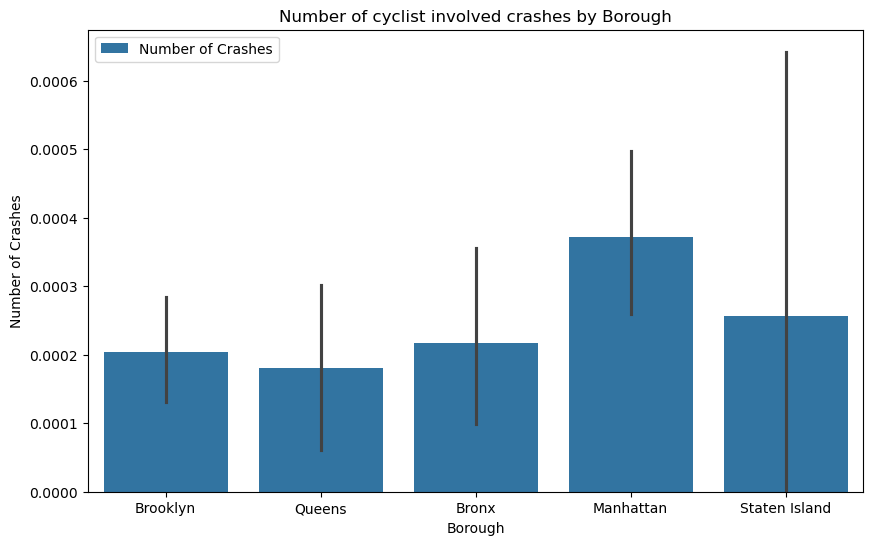

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='borough', y='number_of_cyclist_killed', label='Number of Crashes')
plt.title('Number of cyclist involved crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.show()

In [83]:
df['number_of_cyclist_killed'].unique()

array([0, 1])

In [84]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'on_street_name', 'cross_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'day_of_week', 'month', 'is_weekend', 'hour', 'hour_category', 'season',
       'pedestrian_involved', 'cyclist_involved', 'high_risk'],
      dtype='object')

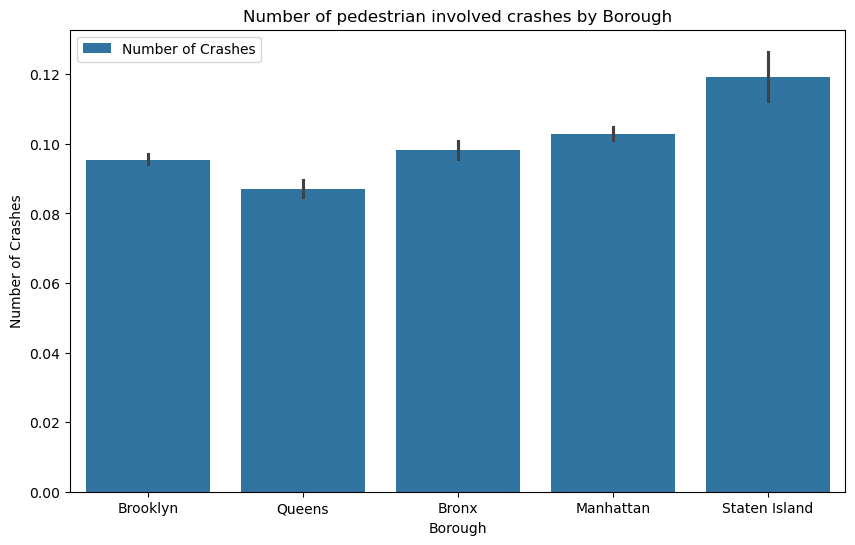

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='borough', y='pedestrian_involved', label='Number of Crashes')
plt.title('Number of pedestrian involved crashes by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.show()

In [86]:
df.isna().sum()

crash_date                            0
crash_time                            0
borough                           27583
zip_code                         107718
latitude                          24170
longitude                         24170
on_street_name                   105048
cross_street_name                180849
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1         0
contributing_factor_vehicle_2         0
collision_id                          0
vehicle_type_code_1                   0
vehicle_type_code_2                   0
day_of_week                           0
month                                 0
is_weekend                            0
hour                                  0


In [87]:
# drop missing values in BOROUGH because it's critical for creating our models
df.dropna(subset=['borough'], inplace=True)

In [88]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,...,vehicle_type_code_2,day_of_week,month,is_weekend,hour,hour_category,season,pedestrian_involved,cyclist_involved,high_risk
2,2023-11-01,01:29:00,Brooklyn,11230,40.62,-73.97,OCEAN PARKWAY,AVENUE K,1.0,0.0,...,SEDAN,2,11,0,1,Late_Night,Fall,0,0,0
42,2022-09-22,16:16:00,Queens,11418,40.70,-73.83,123 STREET,89 AVENUE,1.0,0.0,...,E-SCOOTER,3,9,0,16,Evening_Rush,Fall,0,0,0
43,2023-01-12,21:00:00,Queens,11208,NaN,NaN,NaN,NaN,0.0,0.0,...,UNKNOWN,3,1,0,21,Night,Winter,0,0,0
48,2022-07-12,17:50:00,Brooklyn,11225,40.66,-73.96,NaN,NaN,0.0,0.0,...,UNKNOWN,1,7,0,17,Evening_Rush,Summer,0,0,0
51,2022-04-24,16:45:00,Brooklyn,NaN,40.61,-74.14,STATEN ISLAND EXPRESSWAY,NaN,1.0,0.0,...,STATION WAGON/SPORT UTILITY VEHICLE,6,4,1,16,Evening_Rush,Spring,0,0,0


In [89]:
df.isna().sum()

crash_date                            0
crash_time                            0
borough                               0
zip_code                          80427
latitude                           4314
longitude                          4314
on_street_name                   103793
cross_street_name                162252
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1         0
contributing_factor_vehicle_2         0
collision_id                          0
vehicle_type_code_1                   0
vehicle_type_code_2                   0
day_of_week                           0
month                                 0
is_weekend                            0
hour                                  0


#### Selection of features for our Modeling


- Our `TARGET VARIABLE` will be KSI (Killed or Seriously Injured)
- We'll be defining it as follow: `KSI = "yes" if killed > 0 OR injured > 2`
- We chose KSI as our target because:
    - We'll have more "yes" cases than just counting deaths alone, as the data will be imbalanced.
    - And our stakeholders care about ALL severe outcomes, not just fatalities. 
    - More actionable to predict `harm` than just `death`
    - Better for our model because it will have more positive cases, than just injured or killed alone.


In [90]:
# Target variable KSI (Killed or Seriously Injured)
df['KSI'] = ((df['number_of_persons_killed'] > 0) | (df['number_of_persons_injured'] >= 2)).astype(int)

In [91]:
df['KSI'].value_counts()

KSI
0    311554
1     30864
Name: count, dtype: int64

In [92]:
# Check class distribution
ksi_counts = df['KSI'].value_counts()
ksi_percentage = (ksi_counts[1] / len(df)) * 100

print(f"KSI Distribution:")
print(f"  KSI = 0 (Minor): {ksi_counts[0]:,} ({100-ksi_percentage:.2f}%)")
print(f"  KSI = 1 (Severe): {ksi_counts[1]:,} ({ksi_percentage:.2f}%)")

KSI Distribution:
  KSI = 0 (Minor): 311,554 (90.99%)
  KSI = 1 (Severe): 30,864 (9.01%)


In [93]:
print(f'The KSI percentage is: {ksi_percentage:.2f}%')

'''The KSI percentage is 9.01%, containing 30,456 severe cases out of 338,329 total records. 
Our dataset is imbalanced, but our target variable KSI has a sufficient number of severe cases to build predictive models.'''

The KSI percentage is: 9.01%


'The KSI percentage is 9.01%, containing 30,456 severe cases out of 338,329 total records. \nOur dataset is imbalanced, but our target variable KSI has a sufficient number of severe cases to build predictive models.'

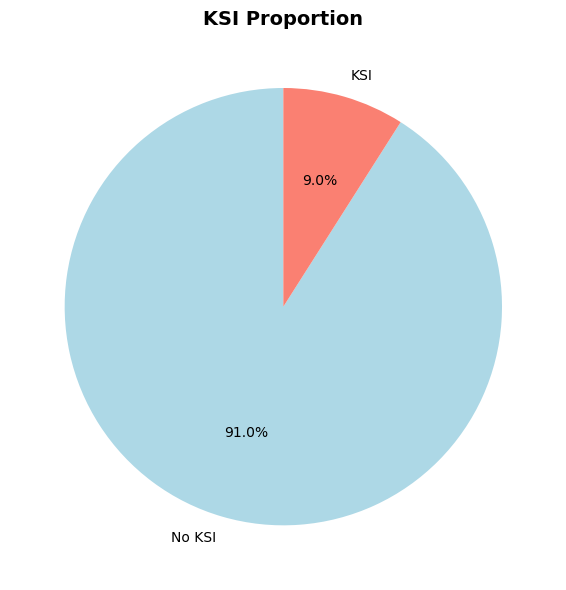

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 6))

ax.pie(
    ksi_counts.values,
    labels=['No KSI', 'KSI'],
    autopct='%1.1f%%',
    colors=['lightblue', 'salmon'],
    startangle=90
)

ax.set_title('KSI Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
#plt.savefig('/Users/Marcy_Student/Desktop/Marcy_Projects/NYC-TrafficSafety-Modeling/figures/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

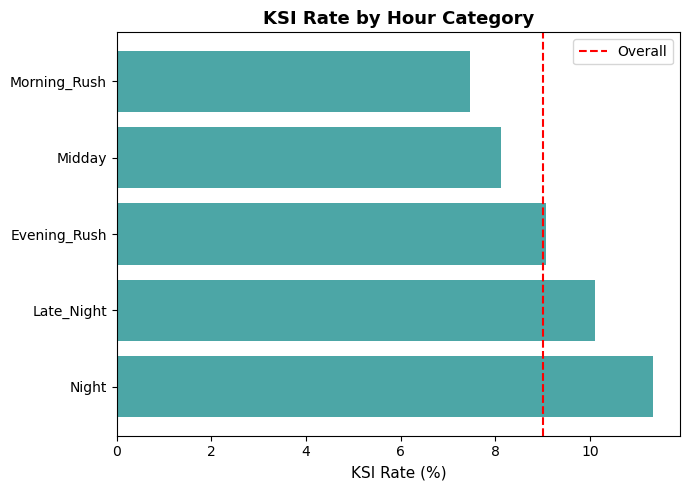

In [95]:
# Hour Category
hour_cat_ksi = df.groupby('hour_category')['KSI'].agg(['sum', 'count'])
hour_cat_ksi['ksi_rate'] = (hour_cat_ksi['sum'] / hour_cat_ksi['count']) * 100
hour_cat_ksi = hour_cat_ksi.sort_values('ksi_rate', ascending=False)

fig, ax = plt.subplots(figsize=(7, 5))
ax.barh(range(len(hour_cat_ksi)), hour_cat_ksi['ksi_rate'], color='teal', alpha=0.7)
ax.set_yticks(range(len(hour_cat_ksi)))
ax.set_yticklabels(hour_cat_ksi.index)
ax.set_xlabel('KSI Rate (%)', fontsize=11)
ax.set_title('KSI Rate by Hour Category', fontsize=13, fontweight='bold')
ax.axvline(x=df['KSI'].mean()*100, color='red', linestyle='--', label='Overall')
ax.legend()
plt.tight_layout()
#plt.savefig('/Users/Marcy_Student/Desktop/Marcy_Projects/NYC-TrafficSafety-Modeling/figures/02_ksi_rate_by_hour_category.png', dpi=300, bbox_inches='tight')
plt.show()

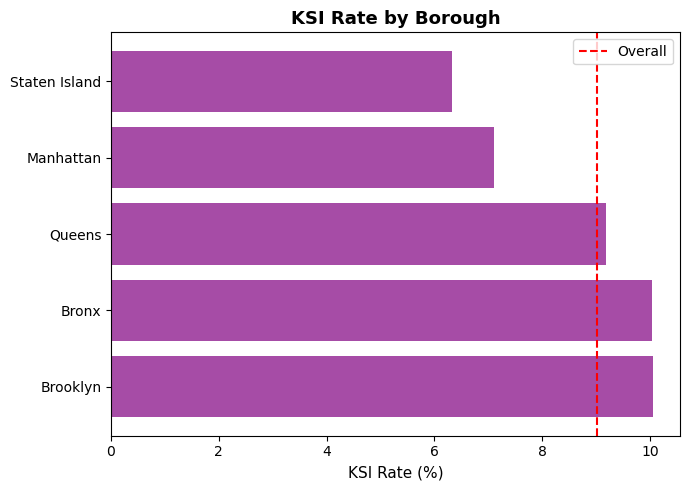

In [96]:
borough_ksi = df.groupby('borough')['KSI'].agg(['sum', 'count'])
borough_ksi['ksi_rate'] = (borough_ksi['sum'] / borough_ksi['count']) * 100
borough_ksi = borough_ksi.sort_values('ksi_rate', ascending=False)

fig, ax = plt.subplots(figsize=(7, 5))

ax.barh(range(len(borough_ksi)), borough_ksi['ksi_rate'], color='purple', alpha=0.7)
ax.set_yticks(range(len(borough_ksi)))
ax.set_yticklabels(borough_ksi.index)
ax.set_xlabel('KSI Rate (%)', fontsize=11)
ax.set_title('KSI Rate by Borough', fontsize=13, fontweight='bold')
ax.axvline(x=df['KSI'].mean()*100, color='red', linestyle='--', label='Overall')
ax.legend()
plt.tight_layout()
#plt.savefig('/Users/Marcy_Student/Desktop/Marcy_Projects/NYC-TrafficSafety-Modeling/figures/03_ksi_rate_by_borough.png', dpi=300, bbox_inches='tight')
plt.show()

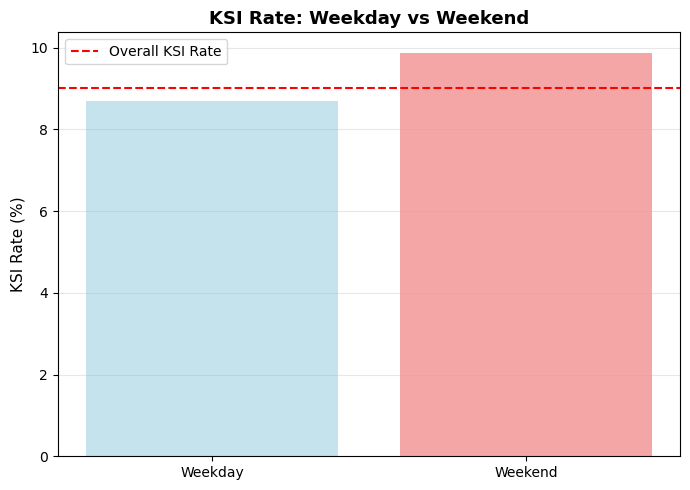

In [97]:
weekend_ksi = df.groupby('is_weekend')['KSI'].agg(['sum', 'count'])
weekend_ksi['ksi_rate'] = (weekend_ksi['sum'] / weekend_ksi['count']) * 100

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(['Weekday', 'Weekend'], weekend_ksi['ksi_rate'], color=['lightblue', 'lightcoral'], alpha=0.7)
ax.axhline(y=df['KSI'].mean()*100, color='red', linestyle='--', label='Overall KSI Rate')
ax.set_ylabel('KSI Rate (%)', fontsize=11)
ax.set_title('KSI Rate: Weekday vs Weekend', fontsize=13, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

ax.legend()
plt.tight_layout()
#plt.savefig('/Users/Marcy_Student/Desktop/Marcy_Projects/NYC-TrafficSafety-Modeling/figures/04_ksi_rate_weekday_vs_weekend.png', dpi=300, bbox_inches='tight')
plt.show()


In [98]:
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'on_street_name', 'cross_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'day_of_week', 'month', 'is_weekend', 'hour', 'hour_category', 'season',
       'pedestrian_involved', 'cyclist_involved', 'high_risk', 'KSI'],
      dtype='object')

In [99]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,on_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,...,day_of_week,month,is_weekend,hour,hour_category,season,pedestrian_involved,cyclist_involved,high_risk,KSI
2,2023-11-01,01:29:00,Brooklyn,11230,40.62,-73.97,OCEAN PARKWAY,AVENUE K,1.0,0.0,...,2,11,0,1,Late_Night,Fall,0,0,0,0
42,2022-09-22,16:16:00,Queens,11418,40.70,-73.83,123 STREET,89 AVENUE,1.0,0.0,...,3,9,0,16,Evening_Rush,Fall,0,0,0,0
43,2023-01-12,21:00:00,Queens,11208,NaN,NaN,NaN,NaN,0.0,0.0,...,3,1,0,21,Night,Winter,0,0,0,0
48,2022-07-12,17:50:00,Brooklyn,11225,40.66,-73.96,NaN,NaN,0.0,0.0,...,1,7,0,17,Evening_Rush,Summer,0,0,0,0
51,2022-04-24,16:45:00,Brooklyn,NaN,40.61,-74.14,STATEN ISLAND EXPRESSWAY,NaN,1.0,0.0,...,6,4,1,16,Evening_Rush,Spring,0,0,0,0


In [100]:
# Now let's select all the necessary columns for our modeling and get the cleaned dataframe
modeling_columns = [
    'borough', 'crash_date', 'crash_time', 'day_of_week', 'month', 'is_weekend',
    'hour', 'hour_category', 'season', 'pedestrian_involved', 'cyclist_involved',
    'vehicle_type_code_1', 'vehicle_type_code_2',
    'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
    'high_risk', 'KSI'
]

In [101]:
df_cleaned = df[modeling_columns].copy()

In [102]:
df_cleaned.head()

,borough,crash_date,crash_time,day_of_week,month,is_weekend,hour,hour_category,season,pedestrian_involved,cyclist_involved,vehicle_type_code_1,vehicle_type_code_2,contributing_factor_vehicle_1,contributing_factor_vehicle_2,high_risk,KSI
2,Brooklyn,2023-11-01,01:29:00,2,11,0,1,Late_Night,Fall,0,0,MOPED,SEDAN,UNSPECIFIED,UNSPECIFIED,0,0
42,Queens,2022-09-22,16:16:00,3,9,0,16,Evening_Rush,Fall,0,0,SEDAN,E-SCOOTER,PASSING OR LANE USAGE IMPROPER,UNSPECIFIED,0,0
43,Queens,2023-01-12,21:00:00,3,1,0,21,Night,Winter,0,0,STATION WAGON/SPORT UTILITY VEHICLE,UNKNOWN,DRIVER INATTENTION/DISTRACTION,UNSPECIFIED,0,0
48,Brooklyn,2022-07-12,17:50:00,1,7,0,17,Evening_Rush,Summer,0,0,SEDAN,UNKNOWN,OVERSIZED VEHICLE,UNSPECIFIED,0,0
51,Brooklyn,2022-04-24,16:45:00,6,4,1,16,Evening_Rush,Spring,0,0,STATION WAGON/SPORT UTILITY VEHICLE,STATION WAGON/SPORT UTILITY VEHICLE,DRIVER INATTENTION/DISTRACTION,UNSPECIFIED,0,0


In [103]:
#export the cleaned dataframe to a new CSV file
#df_cleaned.to_csv('/Users/Marcy_Student/Desktop/Marcy_Projects/NYC-TrafficSafety-Modeling/data/cleaned_motor_vehicle_collisions.csv', index=False)

### Summary
For this Vision Zero traffic safety analysis, we defined the target variable as KSI (Killed or Seriously Injured), where KSI equals 1 if a collision resulted in at least one death OR two or more injuries, and 0 otherwise.
- This definition aligns with Vision Zero's mission to eliminate traffic fatalities and serious injuries while ensuring sufficient positive cases (9.01% of collisions) for our model to train effectively. The threshold of two or more injuries was selected to distinguish truly severe collisions from minor incidents, and to avoid the extreme class imbalance that would result from using deaths alone (which have fewer cases).
- This binary classification target enables actionable predictions that can guide resource allocation and intervention strategies for traffic safety analysts. The resulting dataset contains 30,864 KSI incidents out of 342,418 total collisions. This provides a great and large sample for our classification model to train on.
